In [1]:
# Cell 1: Import all necessary libraries for the heart disease project
# - Loads core scientific libraries (NumPy, Pandas, Matplotlib, Seaborn)
# - Imports machine learning tools for training, tuning, and evaluating models
# - Configures global plot style and suppresses warnings for cleaner output
# - This cell sets up the full environment required for data analysis and modeling


import warnings
warnings.filterwarnings("ignore")

# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Other utilities
from scipy.stats import randint
import pickle

sns.set_style("whitegrid")  # For clean plots

import warnings
warnings.filterwarnings("ignore")

# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Other utilities
from scipy.stats import randint
import pickle

sns.set_style("whitegrid")  # For clean plots


In [20]:
# Cell 2: Load and inspect the heart disease dataset
# - Reads the dataset from CSV
# - Displays the first few rows for a quick preview
# - Prints dataset structure, data types, and missing value summary
# - Shows descriptive statistics to understand feature distributions


data = data = pd.read_csv("../Dataset/heart.csv")


print("Dataset Loaded Successfully!\n")
display(data.head())

print("\nInfo:")
print(data.info())

print("\nMissing Values:")
print(data.isnull().sum())

print("\nSummary Statistics:")
display(data.describe())


Dataset Loaded Successfully!



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target  

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Target Value Counts:

target
1    165
0    138
Name: count, dtype: int64


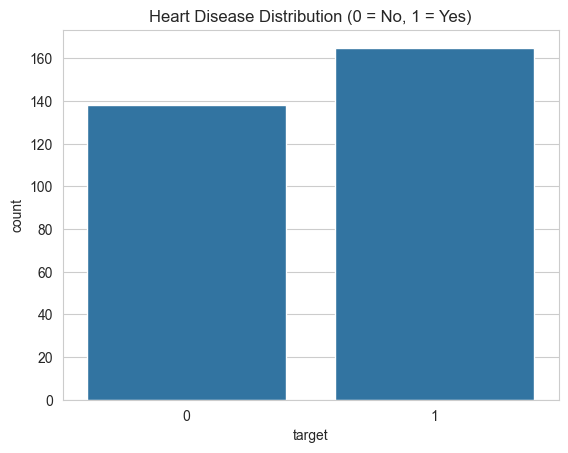

In [3]:
# Cell 3: Explore the target variable distribution
# - Displays the count of each class (0 = no disease, 1 = disease)
# - Plots a countplot to visualize class balance
# - Helps assess whether the dataset is balanced or imbalanced before modeling

print("Target Value Counts:\n")
print(data["target"].value_counts())

sns.countplot(x="target", data=data)
plt.title("Heart Disease Distribution (0 = No, 1 = Yes)")
plt.show()


In [4]:
# Cell 4: Identify categorical and continuous features
# - Splits columns into categorical vs. continuous based on number of unique values
# - Useful for understanding feature types and planning preprocessing or encoding if needed

categorical_vars = []
continuous_vars = []

for col in data.columns:
    if len(data[col].unique()) <= 10:
        categorical_vars.append(col)
    else:
        continuous_vars.append(col)

print("Categorical Variables:", categorical_vars)
print("Continuous Variables:", continuous_vars)


Categorical Variables: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Continuous Variables: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


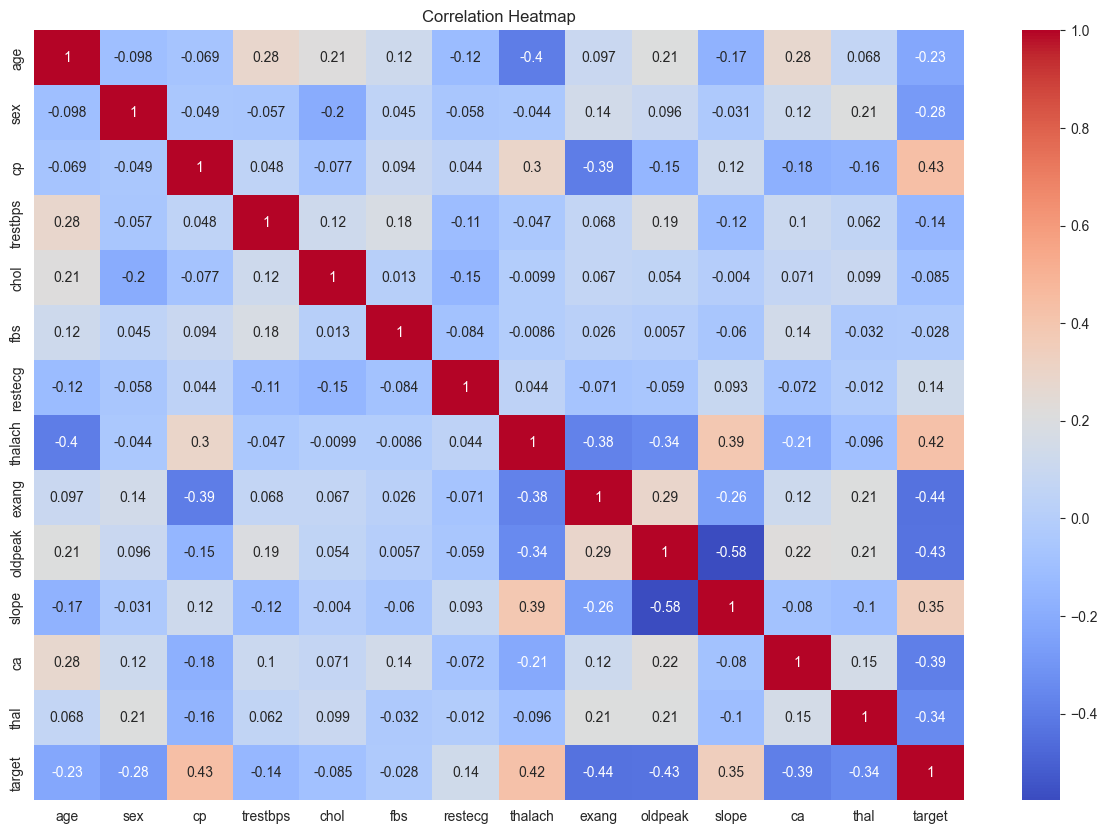

In [5]:
# Cell 5: Visualize feature correlations using a heatmap
# - Computes and plots the correlation matrix of all numerical features
# - Helps identify strong positive/negative relationships between variables
# - Useful for understanding multicollinearity and feature importance patterns

plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [6]:
# Cell 6: Separate features and target variable
# - Splits the dataset into predictor matrix X and target vector y
# - Prints dataset shape and lists all feature names
# - Prepares data for the train/test split and model training steps

X = data.drop(columns="target")
y = data["target"]

print("Shape of Dataset:", data.shape)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("\nFeature columns:\n", list(X.columns))


Shape of Dataset: (303, 14)
Shape of X: (303, 13)
Shape of y: (303,)

Feature columns:
 ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [7]:
# Cell 7: Split the dataset into training and testing sets
# - Uses an 80/20 split to evaluate model performance on unseen data
# - Ensures reproducibility with a fixed random_state
# - Prints the shapes of all resulting sets for verification

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training and Testing Data Split Done.")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Training and Testing Data Split Done.
X_train: (242, 13)
X_test: (61, 13)
y_train: (242,)
y_test: (61,)


In [8]:
# Cell 8: Import machine learning models and evaluation metrics
# - Loads multiple ML classifiers (Logistic Regression, SVM, KNN, Decision Tree, RF, GB, Naive Bayes)
# - Imports key evaluation metrics: precision, recall, F1-score, and classification report
# - These models and metrics will be used to compare performance across algorithms


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report


In [9]:
# Cell 9: Define a collection of ML models for comparison
# - Creates a dictionary mapping model names to classifier instances
# - Includes a diverse set of algorithms (linear, tree-based, probabilistic)
# - SVM is configured with probability=True to enable ROC/AUC computation later
# - This dictionary will be iterated over during the training and evaluation phase


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),  # probability=True for better evaluation later
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier()
}

models


{'Logistic Regression': LogisticRegression(max_iter=1000),
 'SVM': SVC(probability=True),
 'KNN': KNeighborsClassifier(),
 'Decision Tree': DecisionTreeClassifier(),
 'Random Forest': RandomForestClassifier(),
 'Naive Bayes': GaussianNB(),
 'Gradient Boosting': GradientBoostingClassifier()}

In [12]:
# Cell 10 (continued): aggregate results into a DataFrame
results = []
trained_models = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    trained_models[name] = model
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Metrics
    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    
    # Train accuracy for overfitting/underfitting analysis
    train_acc = model.score(X_train, y_train)
    
    results.append({
        "Model": name,
        "Train_Accuracy": train_acc,
        "Test_Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1_Score": f1
    })
    
    print(f"{name} -> Test Accuracy: {acc*100:.2f}% | F1: {f1:.3f}")
    print("-" * 60)

print("Training & evaluation completed.")

# Cell 10 (continued): aggregate results into a DataFrame

heart_results_df = pd.DataFrame(results).set_index("Model")

print("\nSummary of model performance (Heart):")
display(heart_results_df)



Training Logistic Regression...
Logistic Regression -> Test Accuracy: 88.52% | F1: 0.892
------------------------------------------------------------
Training SVM...
SVM -> Test Accuracy: 70.49% | F1: 0.757
------------------------------------------------------------
Training KNN...
KNN -> Test Accuracy: 68.85% | F1: 0.716
------------------------------------------------------------
Training Decision Tree...
Decision Tree -> Test Accuracy: 83.61% | F1: 0.833
------------------------------------------------------------
Training Random Forest...
Random Forest -> Test Accuracy: 83.61% | F1: 0.844
------------------------------------------------------------
Training Naive Bayes...
Naive Bayes -> Test Accuracy: 86.89% | F1: 0.871
------------------------------------------------------------
Training Gradient Boosting...
Gradient Boosting -> Test Accuracy: 77.05% | F1: 0.774
------------------------------------------------------------
Training & evaluation completed.

Summary of model perform

,Train_Accuracy,Test_Accuracy,Precision,Recall,F1_Score
Model,,,,,
Logistic Regression,0.863636,0.885246,0.878788,0.90625,0.892308
SVM,0.657025,0.704918,0.666667,0.87500,0.756757
KNN,0.760331,0.688525,0.685714,0.75000,0.716418
Decision Tree,1.000000,0.836066,0.892857,0.78125,0.833333
Random Forest,1.000000,0.836066,0.843750,0.84375,0.843750
Naive Bayes,0.818182,0.868852,0.900000,0.84375,0.870968
Gradient Boosting,1.000000,0.770492,0.800000,0.75000,0.774194


In [13]:
# Cell 11: Compare Train vs Test accuracy for each heart model
# - Helps identify overfitting (big gap between train and test)
# - Uses heart_results_df created in the previous cell

print("Train vs Test Accuracy for each model (Heart):\n")

for model_name, row in heart_results_df.iterrows():
    train_acc = row["Train_Accuracy"]
    test_acc  = row["Test_Accuracy"]
    diff      = train_acc - test_acc
    print(f"{model_name:20s} -> Train: {train_acc:.3f}, Test: {test_acc:.3f}, Diff (Train - Test): {diff:.3f}")


Train vs Test Accuracy for each model (Heart):

Logistic Regression  -> Train: 0.864, Test: 0.885, Diff (Train - Test): -0.022
SVM                  -> Train: 0.657, Test: 0.705, Diff (Train - Test): -0.048
KNN                  -> Train: 0.760, Test: 0.689, Diff (Train - Test): 0.072
Decision Tree        -> Train: 1.000, Test: 0.836, Diff (Train - Test): 0.164
Random Forest        -> Train: 1.000, Test: 0.836, Diff (Train - Test): 0.164
Naive Bayes          -> Train: 0.818, Test: 0.869, Diff (Train - Test): -0.051
Gradient Boosting    -> Train: 1.000, Test: 0.770, Diff (Train - Test): 0.230


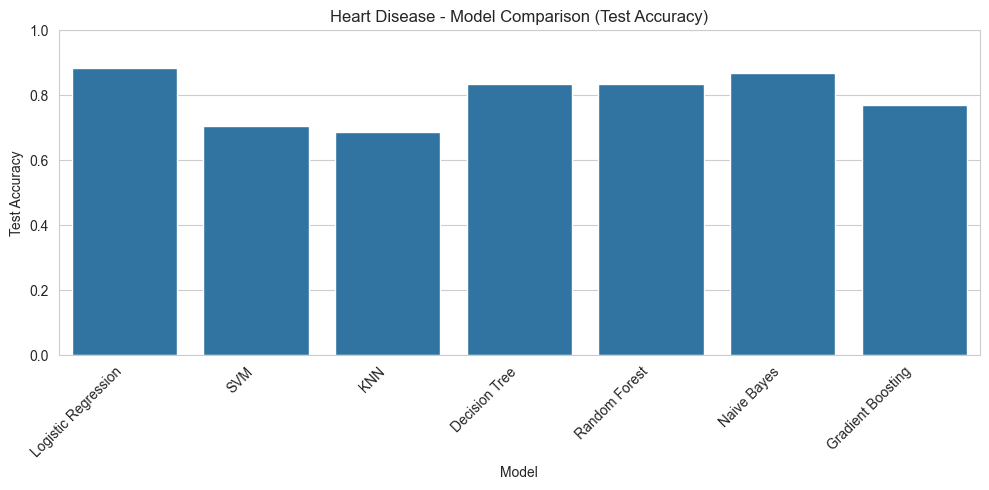

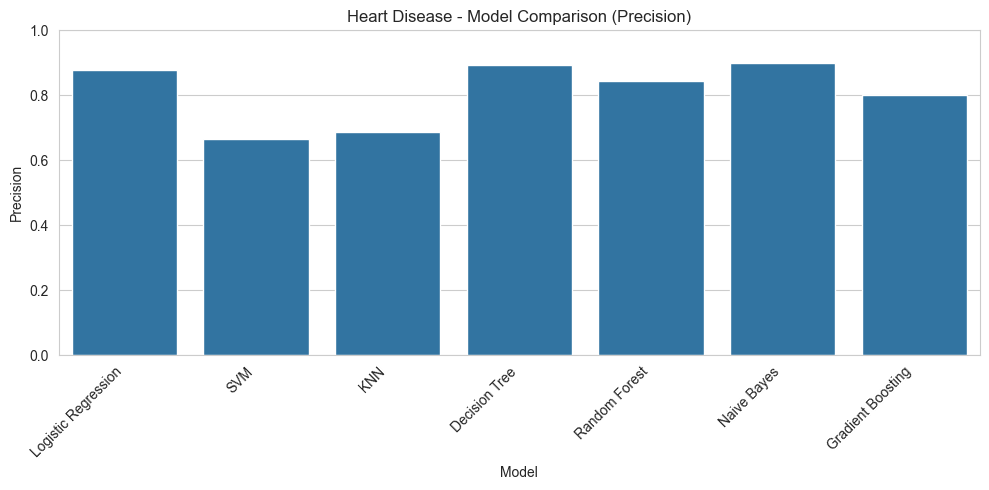

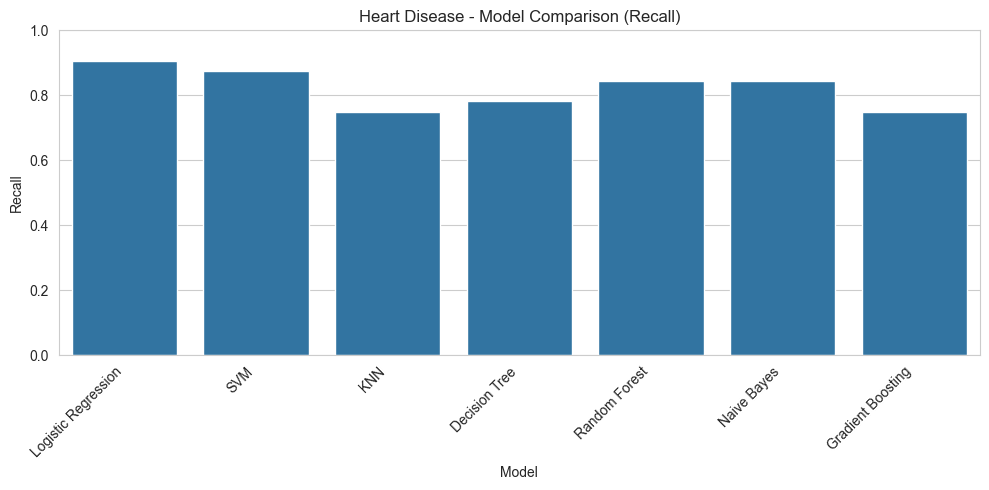

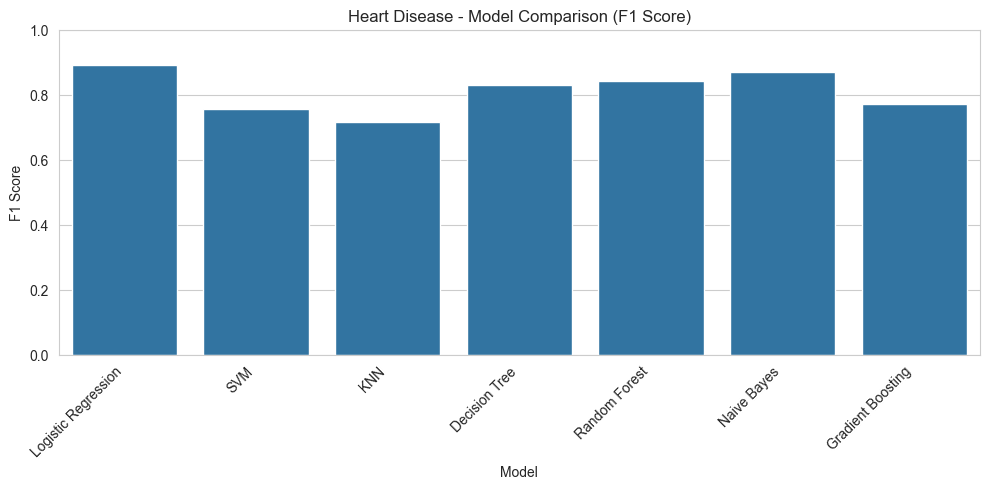

In [14]:
# Cell 12: Metric comparison bar plots for heart models
# - Visual comparison of Test Accuracy, Precision, Recall, and F1-Score
# - Makes it easier to see which model is best overall

metrics_to_plot = ["Test_Accuracy", "Precision", "Recall", "F1_Score"]

for metric in metrics_to_plot:
    plt.figure(figsize=(10, 5))
    sns.barplot(
        x=heart_results_df.index,
        y=heart_results_df[metric].values
    )
    plt.xticks(rotation=45, ha="right")
    plt.ylim(0, 1)
    plt.ylabel(metric.replace("_", " "))
    plt.title(f"Heart Disease - Model Comparison ({metric.replace('_', ' ')})")
    plt.tight_layout()
    plt.show()



<Figure size 400x400 with 0 Axes>

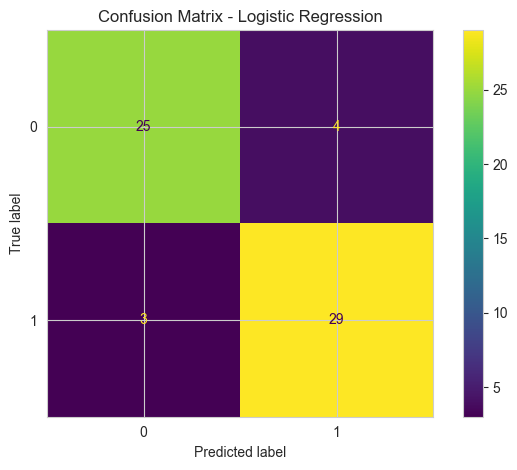

<Figure size 400x400 with 0 Axes>

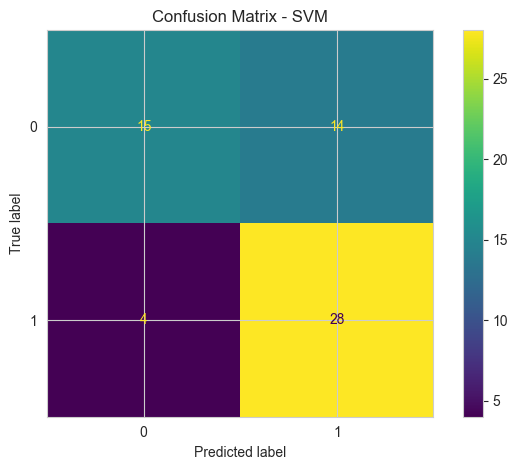

<Figure size 400x400 with 0 Axes>

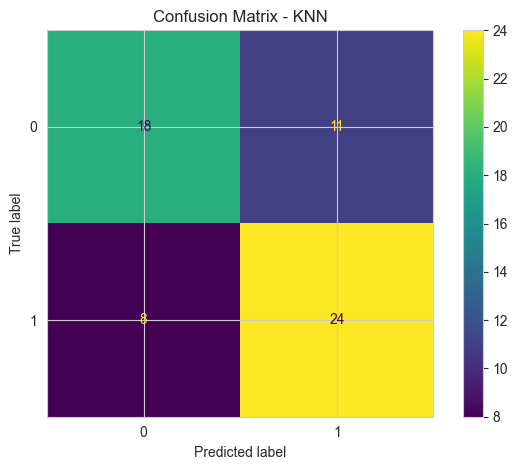

<Figure size 400x400 with 0 Axes>

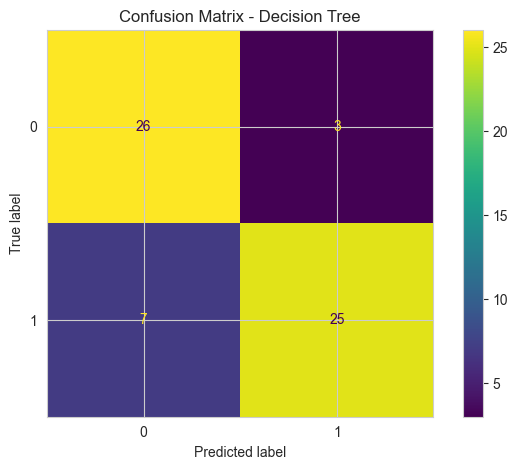

<Figure size 400x400 with 0 Axes>

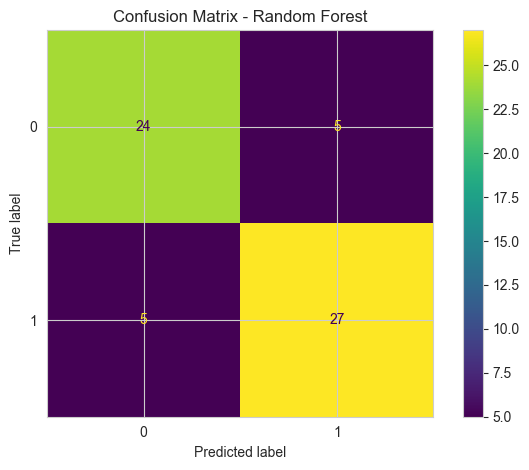

<Figure size 400x400 with 0 Axes>

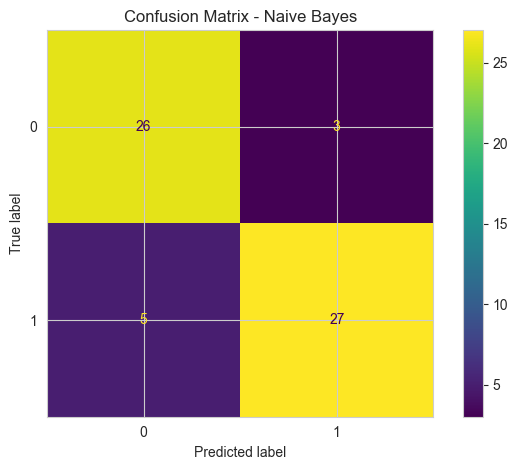

<Figure size 400x400 with 0 Axes>

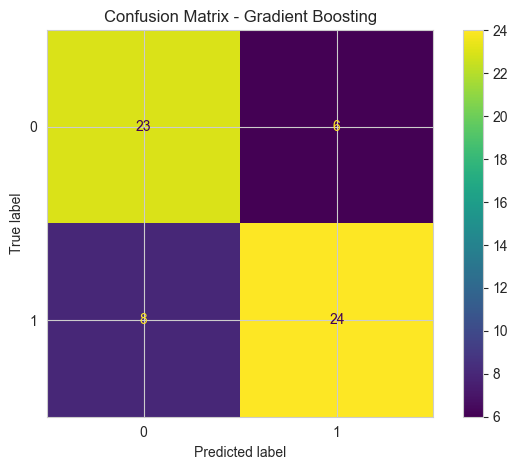

In [15]:
# Cell 13: Confusion matrix for each heart model
# - Shows TP, FP, TN, FN counts for deeper error analysis
# - One confusion matrix per trained model (on test set)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(4, 4))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(values_format="d")
    plt.title(f"Confusion Matrix - {name}")
    plt.tight_layout()
    plt.show()


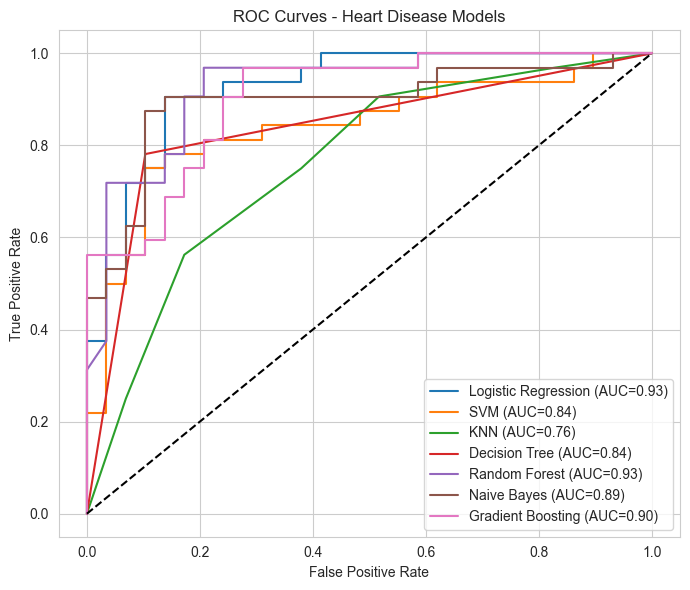

In [16]:
# Cell 14: ROC curves for heart disease models
# - Plots ROC curve and AUC for each model that supports probability scores
# - Good for comparing classification performance beyond a fixed threshold

from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(7, 6))

for name, model in trained_models.items():
    # Use predict_proba if available; otherwise fall back to decision_function
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_test)
    else:
        # Skip models that cannot provide a continuous score
        continue

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - Heart Disease Models")
plt.legend()
plt.tight_layout()
plt.show()


In [18]:
# Cell 15: Select the best-performing heart model based on Test Accuracy
# - Identifies the model with highest test accuracy
# - Retrieves the trained model from trained_models dictionary
# - Generates a detailed classification report for performance breakdown

best_model_name = heart_results_df["Test_Accuracy"].idxmax()
best_model = trained_models[best_model_name]

print(f"Best model based on Test Accuracy: {best_model_name}\n")

# Classification report for the best model
y_pred_best = best_model.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred_best))


Best model based on Test Accuracy: Logistic Regression

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [19]:
# Cell 16: Save the best heart model for Flask deployment

import pickle
import os

model_path = os.path.join("..", "App", "heart_best_model.pkl")

with open(model_path, "wb") as f:
    pickle.dump(best_model, f)

print("Saved best heart model to:", model_path)


Saved best heart model to: ..\App\heart_best_model.pkl
